# Explaining airline passenger satisfaction
* Description: The report details the exploratory analysis supervised machine learning modeling, and model explainability conducted on a dataset detailing customer satisfaction for an airline.
* This project was assembled in a Python 3.10.12 environment using Jupyter Notebooks. The Pandas, Numpy, Seaborn, and Matplotlib libraries were utilized for exploratory analysis. XGBoost and Scikit-Learn were used to create the modelling pipelines and obtain metrics.

* Steps:
  1. Extract, Load and transform data
  2. EDA analysis of the data
  3. Analysis of the most appropriate number of clusters
  4. Training and Testing of the trained K-Means model

* AC:  Github repository to access the project and analyze the process

## Import packeges and tools 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # Visualization data
import seaborn as sns # Visualization data
import nltk
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
pd.set_option("future.no_silent_downcasting", True)


%matplotlib inline

# 1. Dataset

The datasets are in .csv format. The dataset also comes with the target column ‘satisfaction’ pre-defined.

The data used for this project comprised 71,892 initial rows in total with 24 initial columns.

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [3]:
df_train.columns

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'customer_class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction', 'total_delay_time', 'was_flight_delayed'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder

cols_catg = ["satisfaction", "was_flight_delayed",
             "customer_type", "type_of_travel", "gender", "customer_class_business", "customer_class_eco", "customer_class_eco plus"]
score_cols = ["inflight_wifi_service", "departure_arrival_time_convenient", "ease_of_online_booking",
              "gate_location", "food_and_drink", "online_boarding", "seat_comfort", "inflight_entertainment",
              "onboard_service", "leg_room_service", "baggage_handling", "checkin_service", "inflight_service",
              "cleanliness"]

def encode_data(orig_df):
    '''
    Encodes remaining categorical variables of data frame to be ready for model ingestion
    
    Inputs:
       Dataframe
       
    Manipulations:
        Encoding of categorical variables.    
    
    Return: 
        Encoded Column Values
    '''

    df = orig_df.copy()
    # Ordinal encode of scored rating columns.
    encoder = OrdinalEncoder()

    for j in score_cols:
        df[j] = encoder.fit_transform(df[[j]])

    encoded_df = pd.get_dummies(df, columns=['customer_class'])

    for i in cols_catg:
        # creating instance of labelencoder
        labelencoder = LabelEncoder()
        encoded_df[i] = labelencoder.fit_transform(
            encoded_df[i])

    return encoded_df

In [5]:
# Applying encoding to training dataset
df_train_encoded = encode_data(df_train)
# Applying encoding to test dataset
df_test_encoded = encode_data(df_test)

In [6]:
df_train_encoded.cleanliness.value_counts()

cleanliness
3.0    15487
2.0    14117
4.0    12773
1.0     9399
0.0     7834
Name: count, dtype: int64

In [7]:
df_train_encoded.head()

,gender,customer_type,age,type_of_travel,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,total_delay_time,was_flight_delayed,customer_class_business,customer_class_eco,customer_class_eco plus
0,1,0,17,0,2603,3.0,3.0,3.0,2.0,3.0,...,2.0,0.0,2.0,0.0,0,2.0,1,0,1,0
1,1,0,39,0,511,1.0,1.0,1.0,3.0,1.0,...,3.0,1.0,0.0,0.0,0,0.0,0,1,0,0
2,0,1,34,1,297,1.0,3.0,1.0,4.0,4.0,...,4.0,4.0,68.0,64.0,0,132.0,1,0,1,0
3,1,1,47,0,3610,0.0,2.0,0.0,0.0,4.0,...,4.0,3.0,4.0,27.0,1,31.0,1,1,0,0
4,0,1,49,0,305,0.0,0.0,0.0,0.0,3.0,...,4.0,3.0,0.0,0.0,1,0.0,0,1,0,0


In [8]:
df_train_encoded.satisfaction.value_counts()

satisfaction
0    35497
1    24113
Name: count, dtype: int64

In [9]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59610 entries, 0 to 59609
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             59610 non-null  int64  
 1   customer_type                      59610 non-null  int64  
 2   age                                59610 non-null  int64  
 3   type_of_travel                     59610 non-null  int64  
 4   flight_distance                    59610 non-null  int64  
 5   inflight_wifi_service              59610 non-null  float64
 6   departure_arrival_time_convenient  59610 non-null  float64
 7   ease_of_online_booking             59610 non-null  float64
 8   gate_location                      59610 non-null  float64
 9   food_and_drink                     59610 non-null  float64
 10  online_boarding                    59610 non-null  float64
 11  seat_comfort                       59610 non-null  flo

### Correlation of all features against target variable

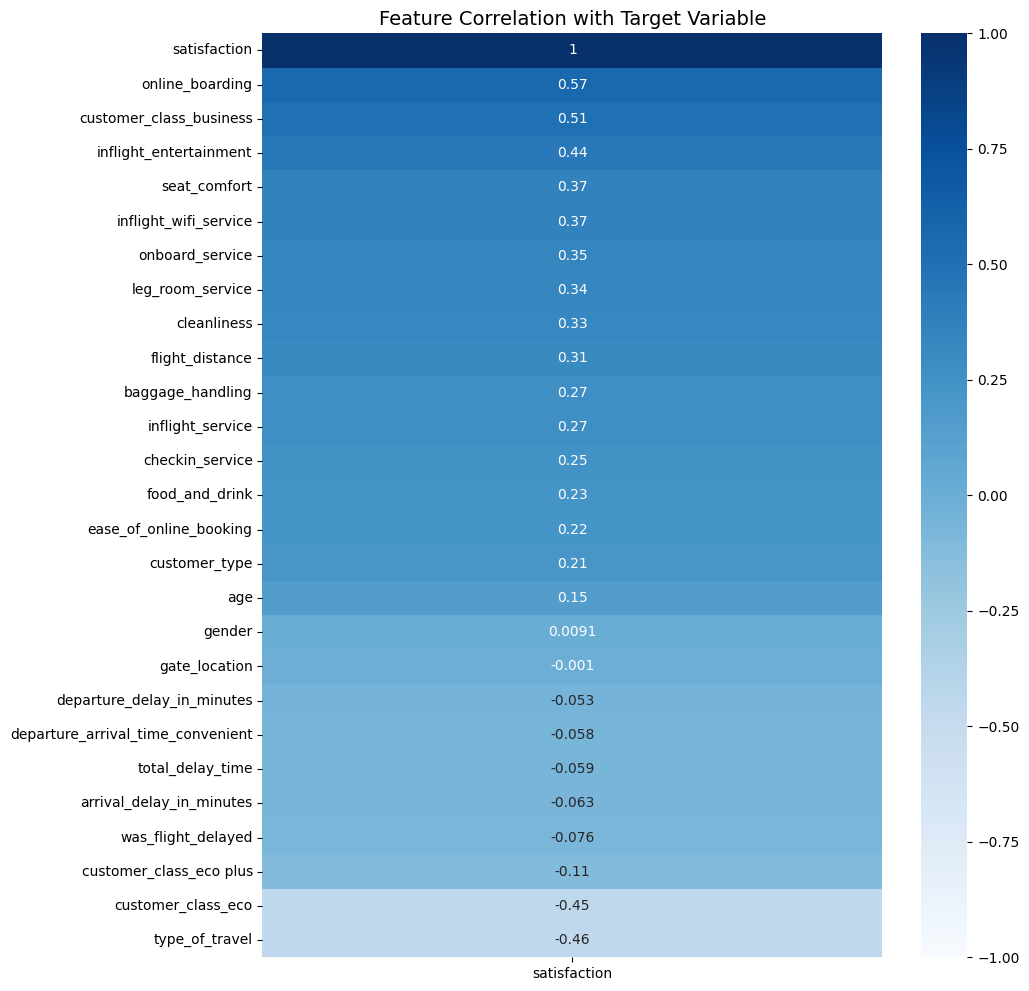

In [10]:
train_corr = df_train_encoded.corr()[['satisfaction']]
train_corr = train_corr

plt.figure(figsize=(10, 12))

heatmap = sns.heatmap(train_corr.sort_values(by='satisfaction', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='Blues')

heatmap.set_title('Feature Correlation with Target Variable', fontdict={'fontsize': 14});

### Feature Selection

In [11]:
# Pre-processing and scaling dataset for feature selection
from sklearn import preprocessing

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df_train_encoded)
 
df_train_scaled = pd.DataFrame(r_scaler.transform(df_train_encoded), columns = df_train_encoded.columns)
df_train_scaled.head()

,gender,customer_type,age,type_of_travel,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,total_delay_time,was_flight_delayed,customer_class_business,customer_class_eco,customer_class_eco plus
0,1.0,0.0,0.128205,0.0,0.519386,0.75,0.75,0.75,0.50,0.75,...,0.50,0.00,0.001256,0.000000,0.0,0.000630,1.0,0.0,1.0,0.0
1,1.0,0.0,0.410256,0.0,0.096931,0.25,0.25,0.25,0.75,0.25,...,0.75,0.25,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
2,0.0,1.0,0.346154,1.0,0.053716,0.25,0.75,0.25,1.00,1.00,...,1.00,1.00,0.042714,0.040404,0.0,0.041562,1.0,0.0,1.0,0.0
3,1.0,1.0,0.512821,0.0,0.722738,0.00,0.50,0.00,0.00,1.00,...,1.00,0.75,0.002513,0.017045,1.0,0.009761,1.0,1.0,0.0,0.0
4,0.0,1.0,0.538462,0.0,0.055331,0.00,0.00,0.00,0.00,0.75,...,1.00,0.75,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0


To conduct feature selection I used Scikit-Learn’s built-in feature selection capability, using K-Best as my selector and Chi-Square values as my criteria. Chi-Square felt like the most appropriate criterion given that I have several categorical variables in the dataset.

In [12]:
# Feature selection, applying Select K Best and Chi2 to output the 15 most important features
from sklearn.feature_selection import SelectKBest, chi2

X = df_train_scaled.loc[:, df_train_scaled.columns != 'satisfaction']
y = df_train_scaled[['satisfaction']]

selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)

features = (X.columns[selector.get_support(indices=True)])
features

Index(['type_of_travel', 'inflight_wifi_service', 'online_boarding',
       'seat_comfort', 'inflight_entertainment', 'onboard_service',
       'leg_room_service', 'cleanliness', 'customer_class_business',
       'customer_class_eco'],
      dtype='object')

In [13]:
selector.pvalues_

array([1.13119300e-001, 6.03623926e-099, 2.98066612e-028, 0.00000000e+000,
       3.01848302e-212, 0.00000000e+000, 3.13004723e-011, 1.92844397e-146,
       9.08432412e-001, 4.82668859e-137, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 2.66656009e-278, 5.94698033e-269, 8.37027075e-127,
       2.12329988e-141, 6.67675196e-122, 7.14377509e-272, 1.11155817e-003,
       1.42679571e-004, 4.10093755e-004, 1.39957051e-035, 0.00000000e+000,
       0.00000000e+000, 5.91186347e-146])

With Chi-Square p-value as the selection criteria, many of the features picked are the different scored aspects of a customer experience, in addition to the reason for travel and the cabin class in which they are travelling.

# Modelling

In [14]:
import sklearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
import xgboost
from xgboost import XGBClassifier

In [15]:
# Features as selected from feature importance
features = features

# Specifying target variable
target = ['satisfaction']

# Splitting into train and test
X_train = df_train_encoded[features].to_numpy()
X_test = df_test_encoded[features]
y_train = df_train_encoded[target].to_numpy()
y_test = df_test_encoded[target]

In [16]:
X_test.shape

(6623, 10)

### Model Activation Function


In [19]:
# Time scores and metrics imports
import time
from resource import getrusage, RUSAGE_SELF
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_score, recall_score, f1_score

In [28]:
# Model activation and result plot function
def get_model_metrics(model, X_train, X_test, y_train, y_test):
    '''
    Model activation function, takes in model as a parameter and returns metrics as specified.
    
    Inputs: 
        model,  X_train, y_train, X_test, y_test
    
    Output: 
        Model output metrics, confusion matrix, ROC AUC curve
    '''

    # Mark of current time when model began running
    t0 = time.time()

    # Fit the model on the training data and run predictions on test data
    model.fit(X_train,  y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Obtain training accuracy as a comparative metric using Sklearn's metrics package
    train_score = model.score(X_train, y_train)
    # Obtain testing accuracy as a comparative metric using Sklearn's metrics package
    accuracy = accuracy_score(y_test, y_pred)
    # Obtain precision from predictions using Sklearn's metrics package
    precision = precision_score(y_test, y_pred)
    # Obtain recall from predictions using Sklearn's metrics package
    recall = recall_score(y_test, y_pred)
    # Obtain f1 from predictions using Sklearn's metrics package
    f1 = f1_score(y_test, y_pred)
    # Obtain ROC score from predictions using Sklearn's metrics package
    roc = roc_auc_score(y_test, y_pred_proba)
    # Obtain the time taken used to run the model, by subtracting the start time from the current time
    time_taken = time.time() - t0
    # Obtain the resources consumed in running the model
    memory_used = int(getrusage(RUSAGE_SELF).ru_maxrss / 1024)

    # Outputting the metrics of the model performance
    print("Accuracy on Training = {}".format(train_score))
    print("Accuracy on Test = {} • Precision = {}".format(accuracy, precision))
    print("Recall = {}".format(recall))
    print("F1 = {} • ROC Area under Curve = {}".format(f1, roc))
    print("Time taken = {} seconds • Memory consumed = {} Bytes".format(
        time_taken, memory_used))

    # Plotting the confusion matrix of the model's predictive capabilities
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    # Plotting the ROC AUC curve of the model
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    return model, train_score, accuracy, precision, recall, f1, roc, time_taken, memory_used

## Model Candidate Pipelines

### Logistic Regression Model


In [29]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Performing randomized search to obtain optimal model parameters

In [30]:
%%time
clf = LogisticRegression()

params = {'n_jobs': [0, 5, 10, 15, 20]}

rscv = RandomizedSearchCV(estimator = clf,
                         param_distributions = params,
                         scoring = 'f1',
                         n_iter = 10,
                         verbose = 1)
rscv.fit(X_train, y_train)
rscv.predict(X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passe

Best parameters: {'n_jobs': 5}
CPU times: user 639 ms, sys: 268 ms, total: 907 ms
Wall time: 10.5 s


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Running model pipeline and obtaining performance metrics

/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on Training = 0.8785270927696696
Accuracy on Test = 0.8811716744677639 • Precision = 0.859122401847575
Recall = 0.8413117225782133
F1 = 0.8501237859455342 • ROC Area under Curve = 0.9482860522900267
Time taken = 0.28270387649536133 seconds • Memory consumed = 321 Bytes


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


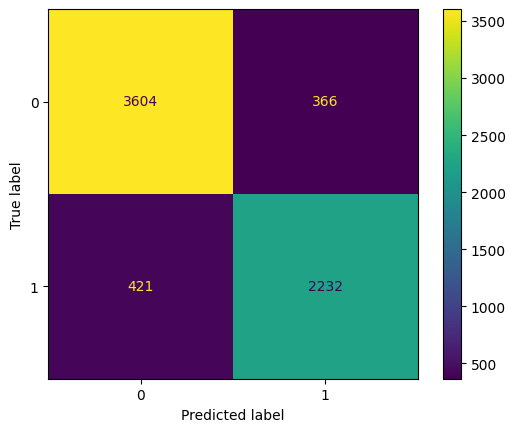

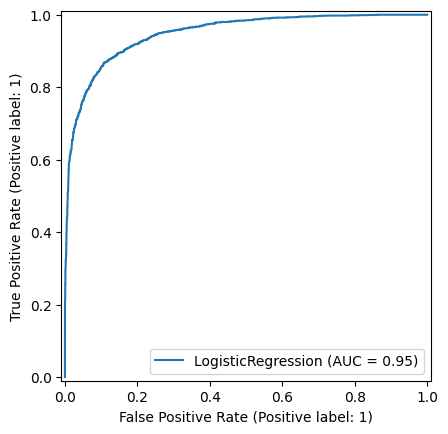

In [31]:
model_lr = LogisticRegression(**params)
model_lr, train_lr, accuracy_lr, precision_lr, recall_lr, f1_lr, roc_lr, tt_lr, mu_lr = get_model_metrics(model_lr,
                                                                                                          X_train,
                                                                                                          X_test,
                                                                                                          y_train,
                                                                                                          y_test)

## Random Forest Classifier
Parameters for Random Forest


In [32]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Performing randomized search to obtain optimal model parameters


In [33]:
%%time
clf = RandomForestClassifier()

params = { 'max_depth': [5, 10, 15, 20, 25, 30],
           'max_leaf_nodes': [10, 20, 30, 40, 50],
           'min_samples_split': [1, 2, 3, 4, 5]}

rscv = RandomizedSearchCV(estimator = clf,
                         param_distributions = params,
                         scoring = 'f1',
                         n_iter = 10,
                         verbose = 1)
rscv.fit(X_train, y_train)
rscv.predict(X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A co

Best parameters: {'min_samples_split': 5, 'max_leaf_nodes': 40, 'max_depth': 30}
CPU times: user 32.1 s, sys: 27.8 ms, total: 32.2 s
Wall time: 32.1 s


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Running model pipeline and obtaining performance metrics


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy on Training = 0.9284683777889616
Accuracy on Test = 0.931601993054507 • Precision = 0.9185692541856926
Recall = 0.9099133056916698
F1 = 0.9142207915167582 • ROC Area under Curve = 0.9762389139807507
Time taken = 1.5411083698272705 seconds • Memory consumed = 331 Bytes


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


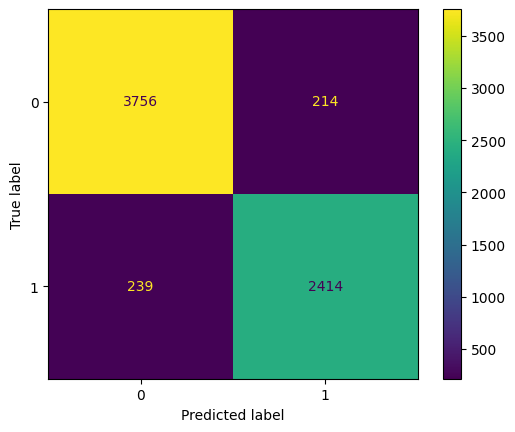

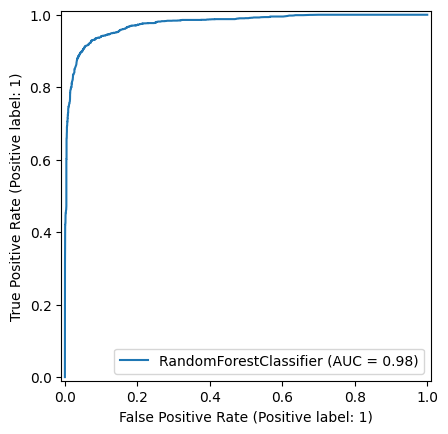

In [34]:
model_rf = RandomForestClassifier(**params)
model_rf, train_rf, accuracy_rf, precision_rf, recall_rf, f1_rf, roc_rf, tt_rf, mu_rf = get_model_metrics(model_rf,
                                                                                                          X_train,
                                                                                                          X_test,
                                                                                                          y_train,
                                                                                                          y_test)

## Adaptive Boosting Classifier (AdaBoost)

Parameters for AdaBoost Classifier


In [35]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

Performing randomized search to obtain optimal model parameters


In [36]:
%%time
clf = AdaBoostClassifier()

params = { 'n_estimators': [25, 50, 75, 100, 125, 150],
           'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0]}

rscv = RandomizedSearchCV(estimator = clf,
                         param_distributions = params,
                         scoring = 'f1',
                         n_iter = 10,
                         verbose = 1)
rscv.fit(X_train, y_train)
rscv.predict(X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algor

Best parameters: {'n_estimators': 100, 'learning_rate': 1.0}
CPU times: user 1min 12s, sys: 27.9 ms, total: 1min 12s
Wall time: 1min 12s


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Running model pipeline and obtaining performance metrics


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Accuracy on Training = 0.9064754235866466
Accuracy on Test = 0.9115204590064925 • Precision = 0.9054531188701451
Recall = 0.8699585375047116
F1 = 0.8873510188389081 • ROC Area under Curve = 0.9650174556440548
Time taken = 2.2550570964813232 seconds • Memory consumed = 333 Bytes


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


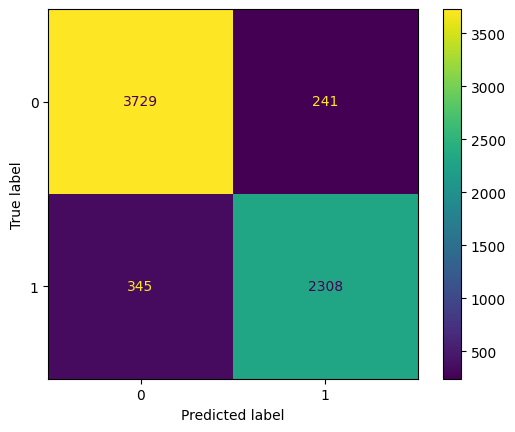

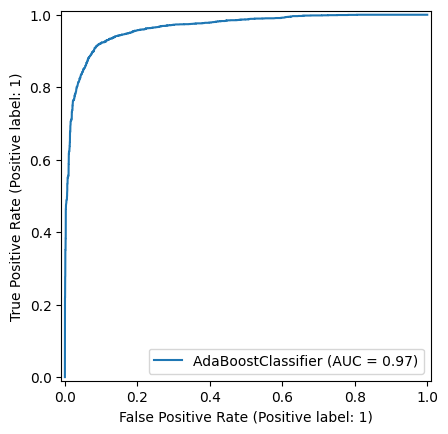

In [37]:
model_ada = AdaBoostClassifier(**params)

# Saving output metrics
model_ada, accuracy_ada, train_ada, precision_ada, recall_ada, f1_ada, roc_ada, tt_ada, mu_ada = get_model_metrics(model_ada,
                                                                                                                   X_train,
                                                                                                                   X_test,
                                                                                                                   y_train,
                                                                                                                   y_test)

## Categorical Naive Bayes
Parameters for Categorical Naive Bayes

In [38]:
CategoricalNB().get_params()

{'alpha': 1.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': True,
 'min_categories': None}

Performing randomized search to obtain optimal model parameters


In [39]:
%%time
clf = CategoricalNB()

params = { 'alpha': [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
           'min_categories': [6, 8, 10]}

rscv = RandomizedSearchCV(estimator = clf,
                         param_distributions = params,
                         scoring = 'f1',
                         n_iter = 10,
                         verbose = 1)
rscv.fit(X_train, y_train)
rscv.predict(X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Best parameters: {'min_categories': 6, 'alpha': 0.0001}
CPU times: user 1.09 s, sys: 8.03 ms, total: 1.1 s
Wall time: 1.1 s


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(


Running model pipeline and obtaining performance metrics


Accuracy on Training = 0.894816305988928
Accuracy on Test = 0.8968745281594444 • Precision = 0.8689138576779026
Recall = 0.8744817188088956
F1 = 0.8716888972383994 • ROC Area under Curve = 0.9520341973014723
Time taken = 0.0633552074432373 seconds • Memory consumed = 338 Bytes


/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(
/home/raziel/Documents/Pepsico_Test/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Cate

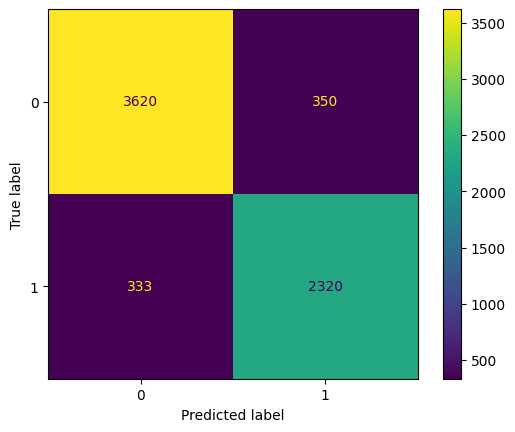

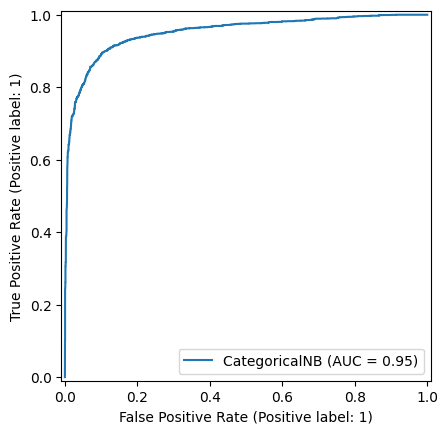

In [40]:
model_cnb = CategoricalNB(**params)

# Saving Output Metrics
model_cnb, accuracy_cnb, train_cnb, precision_cnb, recall_cnb, f1_cnb, roc_cnb, tt_cnb, mu_cnb = get_model_metrics(model_cnb,
                                                                                                                   X_train,
                                                                                                                   X_test,
                                                                                                                   y_train,
                                                                                                                   y_test)

## Extreme Gradient Boosting Classifier (XGBoost)
Parameters for XGBoost Classifier
 

In [41]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Performing randomized search to obtain optimal model parameters


In [42]:
%%time
clf = XGBClassifier()

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'n_estimators': [100, 500, 1000]}

rscv = RandomizedSearchCV(estimator = clf,
                         param_distributions = params,
                         scoring = 'f1',
                         n_iter = 10,
                         verbose = 1)
rscv.fit(X_train, y_train)
rscv.predict(X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1}
CPU times: user 10min 56s, sys: 3.3 s, total: 10min 59s
Wall time: 1min 29s


Running model pipeline and obtaining performance metrics


Accuracy on Training = 0.9518704915282671
Accuracy on Test = 0.9448890231013136 • Precision = 0.9427244582043344
Recall = 0.9182058047493403
F1 = 0.930303608936414 • ROC Area under Curve = 0.9869400735444214
Time taken = 1.126204252243042 seconds • Memory consumed = 680 Bytes


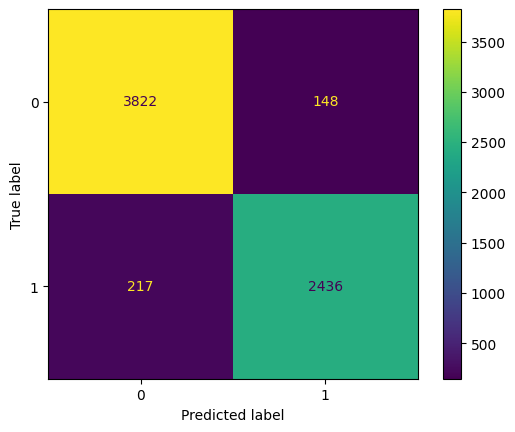

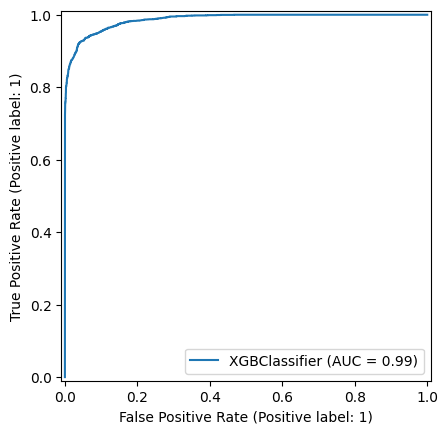

In [43]:
model_xgb = XGBClassifier(**params)

# Saving Output Metrics
model_xgb, accuracy_xgb, train_xgb, precision_xgb, recall_xgb, f1_xgb, roc_xgb, tt_xgb, mu_xgb = get_model_metrics(model_xgb,
                                                                                                                   X_train,
                                                                                                                   X_test,
                                                                                                                   y_train,
                                                                                                                   y_test)

## Comparing output performance of the model pipelines

In [44]:
# Collecting model data
training_scores = [train_lr, train_rf, train_ada, train_cnb, train_xgb]
accuracy = [accuracy_lr, accuracy_rf, accuracy_ada, accuracy_cnb, accuracy_xgb]
precision = [precision_lr, precision_rf,
             precision_ada, precision_cnb, precision_xgb]
recall = [recall_lr, recall_rf, recall_ada, recall_cnb, recall_xgb]
f1_scores = [f1_lr, f1_rf, f1_ada, f1_cnb, f1_xgb]
roc_scores = [roc_lr, roc_rf, roc_ada, roc_cnb, roc_xgb]
time_scores = [tt_lr, tt_rf, tt_ada, tt_cnb, tt_xgb]
memory_scores = [mu_lr, mu_rf, mu_ada, mu_cnb, mu_xgb]

model_data = {'Model': ['Logistic Regression', 'Random Forest', 'Adaptive Boost',
                        'Categorical Bayes', 'Extreme Gradient Boost'],
              'Accuracy on Training': training_scores,
              'Accuracy on Test': accuracy,
              'Precision': precision,
              'Recall': recall,
              'F1': f1_scores,
              'ROC AUC Score': roc_scores,
              'Time Elapsed (seconds)': time_scores,
              'Memory Consumed (bytes)': memory_scores}

model_data = pd.DataFrame(model_data)
model_data

,Model,Accuracy on Training,Accuracy on Test,Precision,Recall,F1,ROC AUC Score,Time Elapsed (seconds),Memory Consumed (bytes)
0,Logistic Regression,0.878527,0.881172,0.859122,0.841312,0.850124,0.948286,0.282704,321
1,Random Forest,0.928468,0.931602,0.918569,0.909913,0.914221,0.976239,1.541108,331
2,Adaptive Boost,0.911520,0.906475,0.905453,0.869959,0.887351,0.965017,2.255057,333
3,Categorical Bayes,0.896875,0.894816,0.868914,0.874482,0.871689,0.952034,0.063355,338
4,Extreme Gradient Boost,0.944889,0.951870,0.942724,0.918206,0.930304,0.986940,1.126204,680


Text(0, 0.5, 'Result')

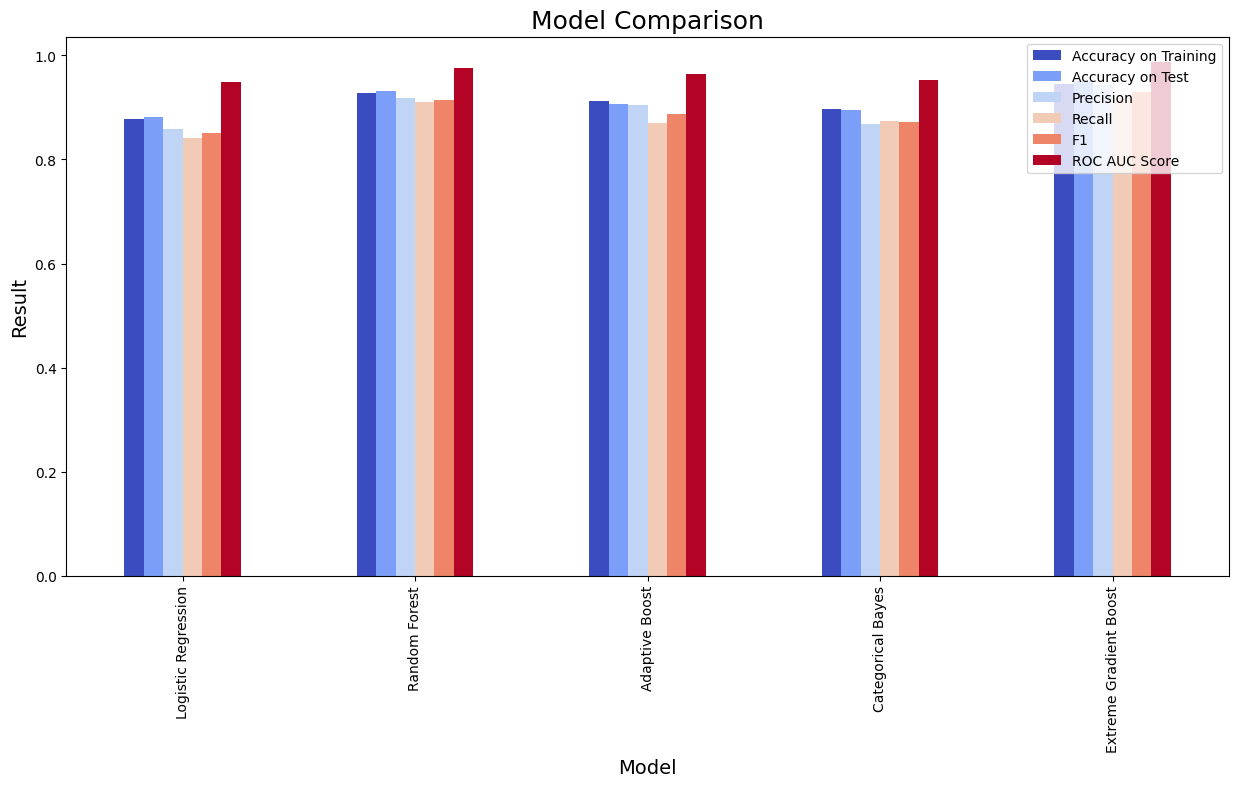

In [46]:
# Plotting each model's performance scores vs time elapsed
plt.rcParams["figure.figsize"] = (15, 7)

ax1 = model_data.plot.bar(x='Model', y=["Accuracy on Training", "Accuracy on Test", "Precision", "Recall",
                                        "F1", "ROC AUC Score"],
                          cmap='coolwarm')
ax1.legend()

ax1.set_title("Model Comparison", fontsize=18)
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Result', fontsize=14, color='Black')

Text(0, 0.5, 'Memory Consumed (bytes)')

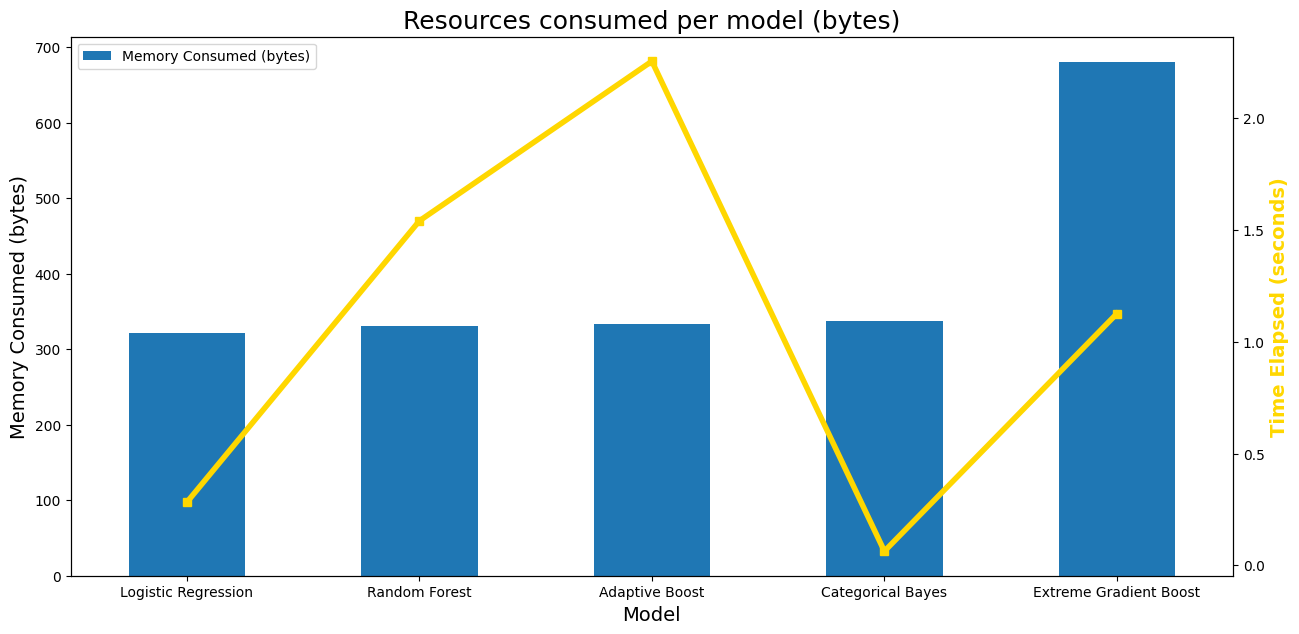

In [47]:
# Plotting each model's memory consumption
ax1 = model_data.plot.bar(x='Model', y='Memory Consumed (bytes)')

ax1.set_title("Resources consumed per model (bytes)", fontsize=18)
ax2 = model_data['Time Elapsed (seconds)'].plot(
    secondary_y=True, color='Gold', linewidth=4, marker='s')
ax1.set_xlabel('Model', fontsize=14)
ax2.set_ylabel('Time Elapsed (seconds)', fontsize=14,
               color='Gold', fontweight='bold')
ax1.set_ylabel('Memory Consumed (bytes)', fontsize=14, color='Black')

At this point if I were to be packaging a model pipeline to recommend to a client, I would be promoting the Extreme Gradient Boosting, ie XGBoost algorithm. Although the model had not performed the most efficiently, it did have the most effective performance.

### Feature importance of finalist pipeline - Extreme Gradient Boosting Classifier (XGBoost)


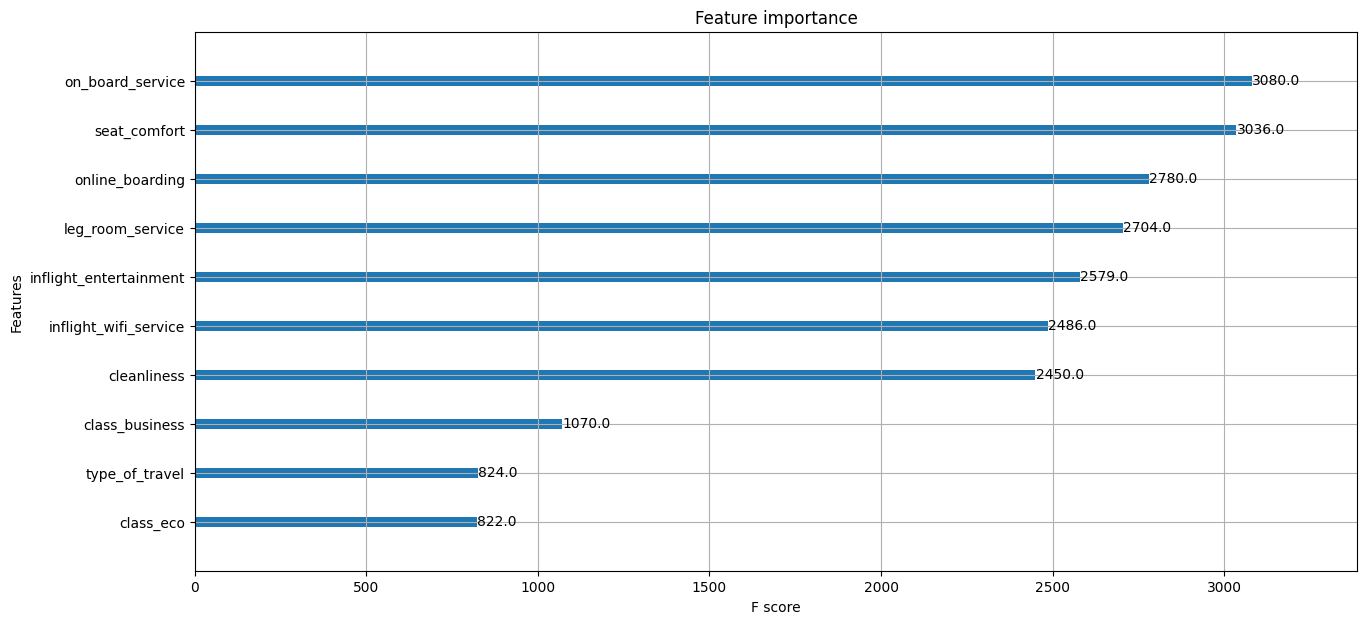

In [48]:
from xgboost import plot_importance

model_xgb.get_booster().feature_names = ['type_of_travel', 'inflight_wifi_service', 'online_boarding',
                                         'seat_comfort', 'inflight_entertainment', 'on_board_service',
                                         'leg_room_service', 'cleanliness', 'class_business', 'class_eco']

plot_importance(model_xgb)
plt.show()

In terms of feature weight (the amount of times a feature was used to split the data) — our model used the seat comfort feature the most to split the data across all possible trees in our model; followed by online boarding, inflight entertainment, onboard service quality, leg room, inflight wi-fi, and cleanliness.